In [2]:
import pandas as pd
import matplotlib.pyplot as plt


d:\Program Files\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 335 (\N{LATIN SMALL LETTER O WITH BREVE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


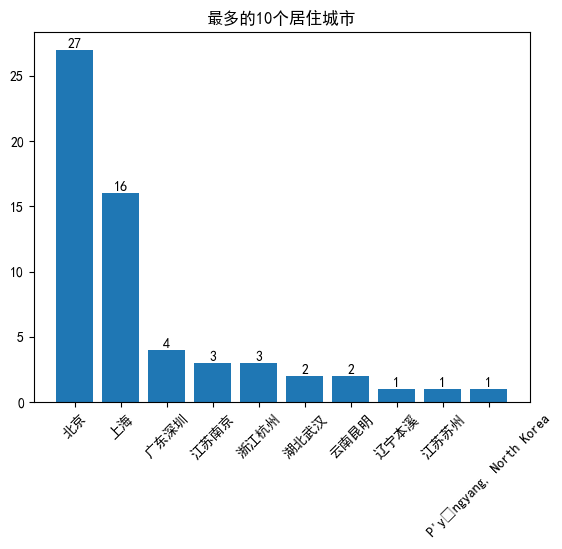

In [3]:
data = pd.read_csv('douban.csv', encoding='utf-8')
num = data['居住城市'].value_counts()[:10]
plt.rcParams['font.family'] = ['SimHei']
plt.bar(range(10), num)
plt.xticks(range(10), num.index, rotation=45)
plt.title('最多的10个居住城市')
for i, j in enumerate(num):
    plt.text(i, j, j, ha='center', va='bottom')
plt.show()

In [7]:
tmp = pd.DataFrame(0, 
                   index=data['评分'].drop_duplicates().sort_values(),
                   columns=data['居住城市'].drop_duplicates())

In [8]:
for i, j in zip(data['评分'], data['居住城市']):
    tmp.loc[i, j] += 1

In [11]:
cities = num.index[:5]
tmp = tmp.loc[:, cities]
tmp = tmp.iloc[:5, :]


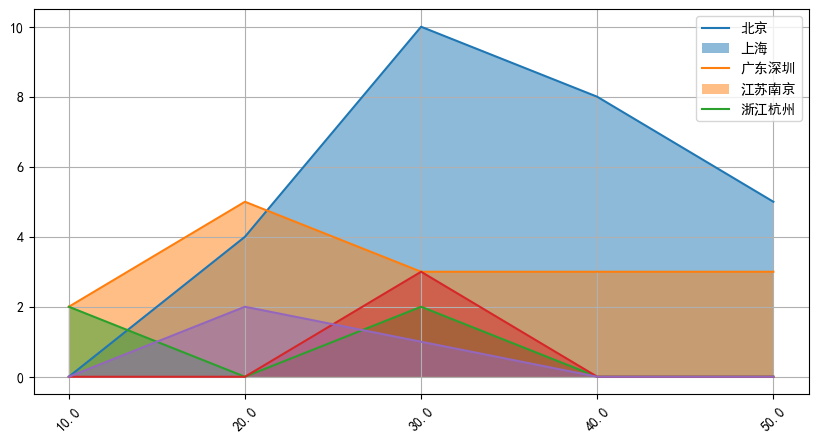

In [12]:
n, m = tmp.shape
plt.figure(figsize=(10, 5))
plt.rcParams['axes.unicode_minus'] = False
for i in range(m):
    plt.plot(range(n), tmp.iloc[:, i])
    plt.fill_between(range(n), tmp.iloc[:, i], alpha=0.5)
plt.legend(tmp.columns)
plt.grid()
plt.xticks(range(n), tmp.index, rotation=45)
plt.show()